# Aproximações lineares (afins) a partir da derivada

A fórmula de Taylor fornece uma aproximação polinomial local cada vez melhor de uma função (muitas vezes) diferenciável à medida que calculamos as suas derivadas. Ela é um pilar fundamental do Cálculo Numérico pois nos ensina como aproximar funções complicadas por funções mais simples. 

Como uma pequena introdução, vejamos a definição de derivada de uma função real em um ponto $x$:
$$
f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}.
$$
Uma outra forma de encarar essa definição é observar que ela nos ensina a aproximar a função $f$ perto de $x$ por uma função linear. Isso é facilmente visto manipulando um pouco a expressão acima:
\begin{align*}
f'(x) &= \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} \iff \\
0 &= \lim_{h \rightarrow 0} \frac{f(x + h) - f(x) - f'(x)h}{h}.
\end{align*}
Nessa última expressão temos o denominador indo para $0$. Normalmente divisões por valores pequenos tendem a gerar valores muito grandes a não ser que o numerador seja menor ainda. Assim a expressão acima nos diz não somente que
$$
\lim_{h \rightarrow 0} f(x + h) - f(x) - f'(x)h = 0,
$$
Mas que essa expressão vai a zero "mais rapidamente" do que $h$ pode ir para $0$.

Note que chamando o ponto $x + h$ de $y$, isso tudo é equivalente a dizer que não somente
$$
\lim_{y \rightarrow x} f(y) - f(x) - f'(x)(y - x) = 0,
$$
mas que $f(y)$ fica cada vez mais parecida com a função de $y$ definida por $f(x) + f'(x)(y - x)$ a medida que y aproxima x. Ou seja, $l(y) = f(x) - f'(x)(y - x)$ pode ser usada como uma boa aproximação de $f(y)$ e essa aproximação vai se tornando cada vez melhor a medida que $y$ está próximo de $x$. Tipicamente isso é escrito como
$$
f(x + h) = f(x) + f'(x)h + o(h)
$$
ou, em termos de $y$,
$$
f(y) = f(x) + f'(x)(y - x) + o(y - x).
$$
A notação $o(h)$ representa uma função qualquer que vai para zero mais rapidamente que $h$. Usando notação matemática temos 
$$
\lim_{h \rightarrow 0} \frac{o(h)}{h} = 0.
$$
Na definição de derivada, o $o(\cdot)$ representa o erro que é feito a se usar a aproximação linear $f(x) + f'(x)h$ no lugar de $f(x + h)$. O que o limite acima nos ensina é que esse erro vai a zero muito, muito, rapidamente.

Isso pode ser visualizado ao apresentarmos os gráficos de $f(y)$ e sua aproximação linear (afim) em torno $x$, a função $l(y) = f(x) + f'(x)(y - x)$.

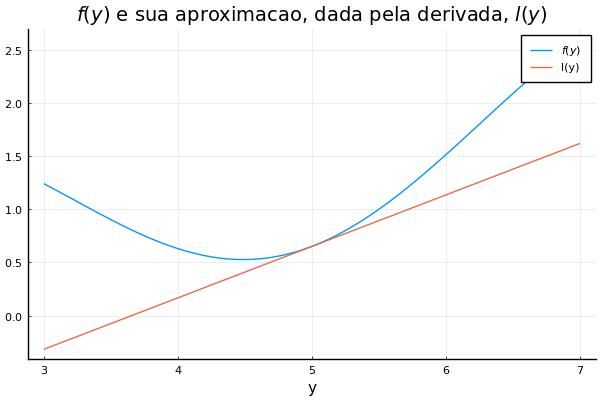

In [1]:
using Plots
pyplot()
using LaTeXStrings

# Troque o x ou o tamanho do intervalo em torno de x para mudar o gráfico.
x = 5
δ = 2.0
intervalo = LinRange(x - δ, x + δ, 100)

# Se quiser troque a expressão de f e sua derivada df.
f(y) = sin(y) + log(y)
df(y) = cos(y) + 1.0/y

# A fórmula da aproximação linear dada pela derivada é sempre a mesma.
l(y) = f(x) + df(x)*(y - x)

plot(intervalo, f.(intervalo), label=L"$f(y)$", xlabel="y")
plot!(intervalo, l.(intervalo), label="$l(y)")
title!(L"$f(y)$ e sua aproximacao, dada pela derivada, $l(y)$")

**Obs:** Pode parecer um pouco confuso usar alternadamente $x + h$ ou $y$ acima, mas é importante entender que isso tenta enfatizar que podemos escolher qualquer uma das duas notações. A vantagem de usar $x + h$ é que aí fica mais claro que é o $h$ que varia indo para zero para se estudar o que ocorre próximo do ponto fixo $x$. Já ao usar $y$ no lugar do $x + h$, o ponto no qual estamos calculando a derivada não fica mais em destaque. Nesse caso estamos interessados em estudar o que ocorre quando $y$ se aproxima de $x$, $y \rightarrow x$. Por outro lado, parece-me mais natural falar de $f(y)$ para $y$ próximo de $x$ do que por a ênfase em na diferença entre esse ponto próximo e $x$, que é o $h$. A partir desse ponto vou dar preferência em usar $y$ e não mais $x + h$.  

Outro resultado relacionado é o teorema do valor médio
$$
\exists z \in (x, y),\quad\quad f'(z) = \frac{f(y) - f(x)}{y - x}.
$$
Mas uma vez podemos reorganizar as contas de maneira a ver esse resultado como uma fórmula alternativa de calcular o $f(y)$:
$$
\exists z \in (x, y),\quad\quad f(y) = f(x) + f'(z)(y - x).
$$
Ou seja, se soubermos como encontrar o $z$, podemos calcular $f(y)$ conhecendo apenas $f(x)$ e $f'(z)$. Diferente da fórmula anterior, que apenas aproximava $f(y)$, essa fórmula é exata. Mas o preço que se paga por isso é o fato que não conhecemos $z$, apenas sabemos que ele está no intervalo $(x, y)$.

# Indo além de aproximações lineares

Essas duas fórmulas podem ser generalizadas de maneira a obter mais informação se tivermos à disposição derivadas de ordem mais altas. Vamos pensar em uma forma natural de fazer isso.

Quando tínhamos uma única derivada aproximamos a função $f(y)$ pela função afim $l(y) = f(x) + f'(x)(y - x)$. Ou seja, usamos um polinômio de grau 1 para fazer essa aproximação. Note que esse polinômio tem as seguintes características:

1. $l(x) = f(x) + f'(x)(x - x) = f(x)$, ou seja ele vale exatamente o valor original da função $f$ no ponto de interesse $x$.

1. $l'(x) = f'(x)$, assim sua derivada é igual à derivada de $f$ no ponto de interesse. $x$.

Uma extensão natural dessa ideia é procurar aproximar $f(y)$ usando um polinômio, que é o tipo de função mais linear mais simples que conhecemos, de grau $n$, que vamos chamar de $p_n(y)$. Se $n = 1$ já sabemos como fazer, como visto acima. Mas podemos estender essa ideia:
$$
p_n(x) = f(x),\quad p_n'(x) = f'(x),\quad p_n''(x) = f''(x),\quad \ldots \quad p_n^{(n)} (x) = f^{(n)}(x).
$$
Vamos tentar escolher o polinômio de modo que o seu valor e de todas as suas variáveiscalculados no ponto $x$ coincidam com os respectivos valores de $f$! Isso é possível?

Inicialmente, vamos tentar escrever o polinômio enfatizando que estamos estudando ele em torno de $x$, ou seja vamos considerar polinômios usando a sua expressão na forma
$$
p_n(y) = c_0 + c_1(y - x) + c_2(y - x)^2 + c_3(y - x)^3 + \ldots + c_n(y - x)^n.
$$
Partindo dessa expressão é fácil calcular $p_n(x)$:
$$
p_n(x) = c_0.
$$
Como queremos que $p_n(x) = f(x)$, acamos de descobrir o único valor possível para $c_0$, ele deve ser $f(x)$.

Vamos para o próximo passo, queremos que $p_n'(x) = f'(x)$. Como $p_n$ é um polinômio, é fácil usar a sua derivada:
$$
p_n'(y) = c_1 + 2c_2(y - x) + 3c_3(y - x)^2 + \ldots + n c_n(y - x)^{n - 1}.
$$
Agora mais uma vez, querer que $p_n'(x) = f'(x)$ simplifica para $c_1 = f'(x)$. Achamos o segundo coeficiente que define o polinômio. Note que até aqui recuperamos a aproximação de grau 1 que já tínhamos visto antes, $l(y)$. 

Vamos além, como estender a aproximação para um polinômio de grau 2? Basta derivar mais uma vez a expressão acima e obtemos:
$$
p_n''(y) = 2 c_2 + 3 \cdot 2 c_3 (y - x) + \ldots + n \cdot (n - 1) c_n (y - x)^{n - 2}.
$$
Então escrever $p_n''(x) = f''(x)$ é definir $2 c_2 = f''(x)$, ou seja $c_2 = f''(x) / 2$. Achamos os coeficientes para conseguir uma aproximação interessante de grau 2. Continuando mais um último passo antes de generalizar, podemos derivar mais uma vez o polinômio e obter
$$
p_n^{(3)}(y) = 3 \cdot 2 c_3 + 4 \cdot 3 \cdot 2 c_4 (y- x) \ldots + n \cdot (n - 1) \cdot (n - 2) c_n (y - x)^{n - 3}.
$$
Agora, queremos que $p_n^{(3)}(x) = f^{(3)}(x)$, que equivale a $6 c_3 = f^{(3)}(x)$, ou $c_3 = f^{(3)}(x) / 3!$. Note que o uso da notação de fatorial é bastante natural, porque esse é o tipo de expressão que surge a medida que vamos derivando o polinômio em sequência. Veja o que está ocorrendo no último termo, que originalmente tinha grau $n$.

Assim, podemos generalizar essas ideias (se quisermos ser formais usando indução) e ver que a fórmula geral do coeficiente do termo de grau $k$ é
$$
c_k = \frac{f^({k})(x)}{k!}.
$$
E o polinômio natural para considerar na apromição é 
$$
f(y) \approx p_n(y) = f(x) + f'(x)(y - x) + \frac{f''(x)}{2!}(y - x)^2 + \ldots + \frac{f^{(n)}(x)}{n!}(y - x)^n.
$$
Esse é o polinômio de Taylor, que vocês devem ter visto nas aulas de cálculo.

Será que ele funciona bem? Vamos ver isso. Teste valores diferentes para o grau do polinômio aproximador abaixo.

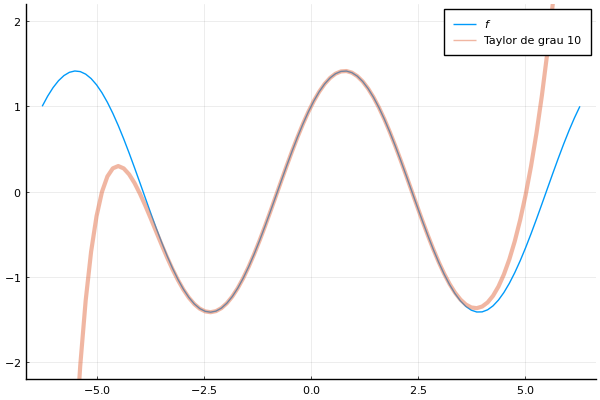

In [17]:
# Grau do polinômio de Taylor
grau = 10

# Ponto onde será feita a aproximação.
ponto = 0

# Estou escolhendo a função sin(x) + cos(x) porque é fácil implementar
# código que calcula todas as suas derivadas.
f(x) = sin(x) + cos(x)

function df(x, ordem=1)
    resto4 = mod(ordem, 4)
    if resto4 == 0
        return sin(x) + cos(x)
    elseif resto4 == 1
        return cos(x) - sin(x)
    elseif resto4 == 2
        return -sin(x) - cos(x)
    else
        return -cos(x) + sin(x)
    end
end

function taylor(x, grau)
    coefs = Float64[]
    fat = 1
    for k = 0:grau
        push!(coefs, df(x, k) / fat)
        fat *= (k + 1)
    end
    return coefs
end

function eval_taylor(coefs, y, x)
    grau = length(coefs) - 1
    termos = coefs .* [(y - x)^i for i = 0:grau]
    return sum(termos)
end

coefs_pn = taylor(ponto, grau)
function pn(y)
    return eval_taylor(coefs_pn, y, ponto)
end

xs = LinRange(ponto - 2*pi, ponto + 2*pi, 100)
plot(xs, f.(xs), label=L"f")
plot!(xs, pn.(xs), lw=3, alpha=0.5, label="Taylor de grau $grau")
ylims!((-2.2, 2.2))

A qualidade das aproximações de Taylor é capturada pelos seguintes teoremas:

> **Teorema (Fórmula de Taylor).** Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ uma função e $x$ um número real no qual as derivadas $f'(x), f''(x), \ldots, f^{(n)}(x)$  existem. Então, se definirmos o polinômio (conhecido como _polinômio de Taylor_)
$$
p_n(y) = f(x) + f'(x)(y - x) + \frac{f''(x)}{2!}(y - x)^2 + \ldots + \frac{f^{(n)}(x)}{n!}(y - x)^n,
$$
vale que 
$$
\lim_{y \rightarrow x} \frac{f(y) - p_n(y)}{(y - x)^n} = 0.
$$
Outra forma de escrever isso é
$$
f(y) = p_n(y) + o((y - x)^n).
$$

Já a variação desse resultado associada ao teorema do valor médio é apresentado abaixo. Nela é possível ver de forma mais explícita o erro. 

> **Teorema (Fórmula de Taylor com resto de Lagrange).** Seja $f: \mathbb{R} \rightarrow \mathbb{R}$ uma função e $x, y$ dois números reais. Se as derivadas $f', f'', \ldots, f^{(n+1)}$ estão todas definidas no intervalo $[x, y]$, então existe $z \in (x, y)$ tal que
$$
f(y) = p_n(y) + \frac{f^{(n+1)}(z)}{(n+1)!}(y- x)^{n+1}.
$$

Os dois resultados acima podem ser generalizados para funções de mais de uma variável, em particular se $f: \mathbb{R}^n \rightarrow \mathbb{R^m}$ e $Jf(x)$ é a matriz jacobiana de $f$, ou seja a matriz definida por
$$
Jf(x)_{ij} = \frac{\partial f_i(x)}{\partial x_j},\quad\quad i=1,\ldots,m,\ j = 1, \ldots, n,
$$
vale
$$
f(y) = f(x) + Jf(x)(y - x) + o(|| y - x ||).
$$
Aproximações de ordem mais alta também são possíveis, mas não vamos usá-las em nosso curso.

# Aproximações de derivadas

Nessa seção consideramos que as funções tem tantas derivadas quanto forem necessárias para a discussão. 

Uma primeira aplicação da fórmula de Taylor é a aproximação de derivadas. Muitas vezes o cômputo de uma derivada pode ser um trabalho muito tedioso de programação, por exemplo quando a função tenha uma fórmula muito complexa. Um caso extremo é quando a função $f$ não é de fato conhecida (não há uma fórmula explícita para ela). Isso ocorre por exemplo se a função puder apenas ser avaliada por um programa de computador do qual não temos acesso ao código fonte ou através algum experimento físico. 

Em situações assim podemos nos perguntar se é possível calcular aproximações da derivada de $f$ apenas avaliando a função. A fórmula de Taylor nos dá imediatamente uma opção
$$
f'(x) \approx \frac{f(y) - f(x)}{y - x},
$$
para $y$ próximo a $x$. Se denotarmos diferença $y - x$ por $h$, temos
$$
f'(x) \approx \frac{f(x + h) - f(x)}{h},
$$
para $h$ pequeno.

Para vermos que essa fórmula é valida, vamos considerar a fórmula de Taylor com resto de Lagrange. Sabemos que deve existir $z \in (x, x + h)$ tal que 
$$
f(x + h) = f(x) + f'(x)h + \frac{f''(z)}{2}h^2.
$$
Como dissemos acima, a fórmula só faz sentido se $h$ é pequeno, logo podemos admitir que módulo de $h$ é sempre menor que um certo valor $H$, e assim os intervalos que contem $z$ são tais que $(x, x + h) \subset [x - H, x + H]$, um intervalo fixo. Além disso, como $f''$ é contínua (vamos considerar que $f$ é três vezes diferenciável), seu módulo atinge máximo em $[x - H, x + H]$, vamos chamar de $L_{f''}$ esse máximo. Podemos então concluir que
\begin{align*}
f'(x) &= \frac{f(x + h) - f(x)}{h} - \frac{f''(z)}{2}h \iff \\
f'(x) &= \frac{f(x + h) - f(x)}{h} + \delta_x,
\end{align*}
em que $| \delta_x | \leq (L_{f''}/2)|h|$.

Confirmamos assim que a fórmula para aproximar a derivada que vimos antes funciona, já que seu erro vai diminuir com $h$. De fato, sabemos até como o erro dessa aproximação, que foi chamado de $\delta_x$, se comporta. Ele é no máximo $(L_{f''}/2)|h|$, indo para zero tão rapidamente quanto $h$.

Um problema dessa fórmula é que ela pode passar a impressão de que quanto menor $h$ melhor será a aproximação obtida. Porém ao a implementarmos no computador não conseguimos calcular exatamente $f(x)$ ou $f(x + h)$, ou mesmo a divisão. O máximo que conseguimos calcular é algo que está perto desses valores, no melhor caso com precisão relativa limitada pelo epsilon da máquina ($\epsilon_{mac}$). Ou seja se chamarmos de $\bar f$ a função que de fato calculamos vamos, no melhor dos casos, obter valores tais que
\begin{align*}
| \bar{f}(x) - f(x) | &\leq \epsilon_{mac} L_f \\
| \bar{f}(x + h) - f(x + h) | &\leq \epsilon_{mac} L_f,
\end{align*}
aqui $L_f$ denota um limitante superior para os valores de $f$ no intervalo de interesse. 

Vamos retomar o tipo de análise que fizemos acima para achar uma expressão para o erro que leve em consideração os erros gerados pela representação no computador. Já sabemos que não temos os valores exatos calculados, temos apenas os valores aproximados cujos os erros máximos foram estimados acima. Usando essas estimativas vemos que existem $\gamma_{x}$ e $\gamma_{x + h}$, com valor absoluto menor ou igual a $\epsilon_{mac} L_f$, tais que
\begin{align*}
f(x) &= \bar{f}(x) + \gamma_x \\
f(x + h) &= \bar{f}(x + h) + \gamma_{x + h}.
\end{align*}
Podemos substituir esses valores na estimativa que tínhamos para erro.
\begin{align*}
f'(x) &= \frac{f(x + h) - f(x)}{h} + \delta_x, \\
&= \frac{\bar{f}(x) + \gamma_x - \bar{f}(x + h) - \gamma_{x + h}}{h} + \delta_x \\
&= \frac{\bar{f}(x) + \bar{f}(x + h)}{h} + \frac{\gamma_x - \gamma_{x + h}}{h} + \delta_x.
\end{align*}
A primeira parcela é justamente a aproximação de derivada que conseguimos calcular no computador, ignorando o erro introduzido pela divisão. Assim o erro entre o que conseguimos calcular e a derivada real é
$$
\frac{\gamma_x - \gamma_{x + h}}{h} + \delta_x.
$$
Retomando os limitantes que temos sobre o módulo de cada um dos termos na expressão acima concluímos que o erro é menor ou igual a
$$
2\frac{\epsilon_{mac} L_f}{h} + \frac{L_{f''}h}{2}.
$$
Observe que o primeiro termo dessa expressão, que vem do erro de trabalharmos no computador, na verdade aumenta a medida que $h$ diminui. Já o segundo termo, que vem da expansão de Taylor, diminui com $h$. Logo agora já não é claro que devemos tomar $h$ o menor possível. De fato deve haver um $h$ de compromisso, que minimiza a expressão acima. Usando o que aprendemos em cálculo, o ponto de mínimo com respeito a $h$ deve ser um ponto no qual a derivada se anula. Calculando esse ponto, concluímos que $h$ deve obedecer a
$$
h^2 = \frac{4L_f\epsilon_{mac}}{L_{f''}}.
$$
Ou seja, queremos escolher $h$ de modo que
$$
| h |  = 2 \sqrt{\frac{L_f}{L_{f''}}} \sqrt{\epsilon_{mac}}.
$$

Agora fica difícil continuar sem conhecer pelo menos aproximações para os valores $L_f$ e $L_{f''}$. Mas de qualquer forma a expressão acima já nos ensina que devemos escolher $h$ proporcional a $\sqrt{\epsilon_{mac}}$. Muitas vezes o valor final usado é exatamente esse, como no código abaixo.

In [3]:
# Calcula uma aproximação de derivada de f no ponto x usando a fórmula de diferença.
function dif(f, x, h=sqrt(eps(1.0)))
    return (f(x + h) - f(x)) / h
end

# Função para teste e sua derivada.
f(x) = sin(x) + cos(x)
df(x) = cos(x) - sin(x)

# Função simples para calcular o erro relativo entre a aproximação e o valor exata
function erro_rel(aprox, exato)
    return abs(aprox - exato) / abs(exato)
end

# Teste da aproximação
println("Valor exato da derivada: ", df(1), " - valor da aproximação: ", dif(f, 1))
println("Erro relativo na aproximação: ", erro_rel(dif(f, 1), df(1)))

Valor exato da derivada: -0.30116867893975674 - valor da aproximação: -0.30116869509220123
Erro relativo na aproximação: 5.363255086786758e-8


Nada mal, um erro próximo de $10^{-8}$. Agora vamos ver o que aconteceria se tentássemos usar um $h$ muito pequeno, como parecia ser melhor antes de fazermos a análise mais sofisticada do erro.

In [4]:
# Teste da aproximação
println("Valor exato da derivada: ", df(1), " - valor da aproximação: ", dif(f, 1, 1.0e-14))
println("Erro relativo na aproximação: ", erro_rel(dif(f, 1, 1.0e-14), df(1)))

Valor exato da derivada: -0.30116867893975674 - valor da aproximação: -0.2886579864025407
Erro relativo na aproximação: 0.04154048349668716


De fato o erro aumentou e muito. Podemos fazer melhor, podemos testar diferentes valores de $h$ e apresentar o gráfico dos erros relativos. Note que usamos o negativo do logaritmo na base 10 do erro para que o gráfico apresente o número de casas decimais corretas em função de $h$.

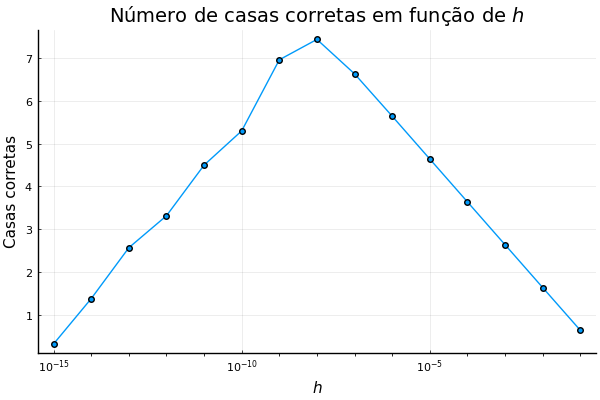

In [5]:
ponto = 1
expoentes =  LinRange(-1, -15, 15)
h = 10.0.^expoentes
aproxs = dif.(f, ponto, h)

plot(h, -log10.(erro_rel.(aproxs, df(ponto))), 
     xaxis=:log10, label="", marker=:c,
     xlabel=L"h", ylabel="Casas corretas")
title!(L"Número de casas corretas em função de $h$")

Como vocês podem ver o número de casa corretas é maximizado em torno de $10^{-8}$. Lembre ainda que maximizar o número de casas corretas é equivalente a minimizar o erro. Mais importante, o gráfico acima confirma a análise feita acima que sugere que o o erro começa diminuindo até um certo ponto quando começa a aumentar.

Mas será que ainda é possível fazer melhor? Ou seja, será que é possível obter uma expressão para o erro que seja mais precisa do que fórmula de diferença já apresentada?

A resposta para isso é afirmativa, a fórmula é conhecida como diferença centrada:
$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$
O nome vem do fato que a fórmula se baseia em calcular o valor de $f$ em dois pontos que possuem $x$ como "centro".

Para analisar o porque essa fórmula é melhor do que a anterior, vamos analisar suas expansões de Taylor.
\begin{align*}
f(x + h) &= f(x) + f'(x)h + \frac{f''(x)}{2} + \frac{f'''(z_h)}{6}h^3, \\
f(x - h) &= f(x) - f'(x)h + \frac{f''(x)}{2} - \frac{f'''(z_{-h})}{6}h^3,
\end{align*}
em que os números $z_h \in (x, x+h)$ e $z_{-h} \in (x, x - h)$. Subtraindo essas expressões e dividindo por $2h$ temos
$$
f'(x) = \frac{f(x + h) - f(x - h)}{2h} + \frac{f'''(z_h) + f'''(z_{-h})}{12}h^2.
$$
Mais uma vez, denotando por $L_{f'''}$ o máximo do valor absoluto de $f'''$ no intervalo $[x - h, x + h]$, podemos afirmar que erro agora é limitado por
$$
\frac{L_{f'''}}{6} h^2.
$$
Note que a fórmula de erro nos ensina o erro da diferença centrada vai para zero muito mais rapidamente do que o erro da fórmula de diferença original. Para diferença centrada o erro é proporcional a $h^2$, que é muito menor do $h$, associado ao erro da fórmula original, para $h$ pequeno. Será que podemos confirmar isso empiricamente?

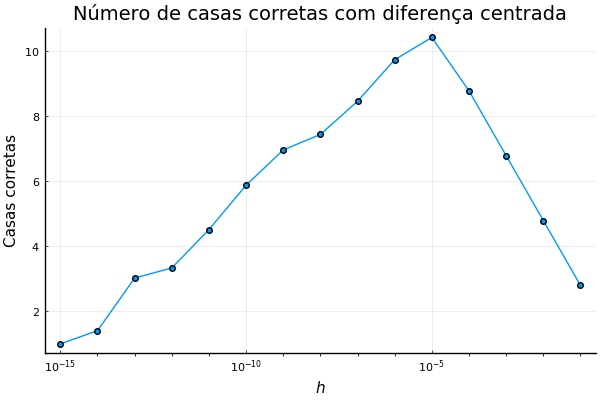

In [6]:
# Calcula uma aproximação de derivada de f no ponto x usando a fórmula de diferença.
function dif_centrada(f, x, h=eps(1.0)^(1/3))
    return (f(x + h) - f(x - h)) / (2*h)
end

aproxs = dif_centrada.(f, 1, h)

plot(h, -log10.(erro_rel.(aproxs, df(ponto))), 
     xaxis=:log10, label="", marker=:c,
     xlabel=L"h", ylabel="Casas corretas")
title!("Número de casas corretas com diferença centrada")

Como imaginávamos, é possível atingir uma precisão mais alta, com mais de dez casas corretas ao invés de ficar limitado a oito. Note também que o $h$ ideal para a diferença centrada é maior do que o $h$ ideal da diferença comum. De fato uma análise cuidadosa semelhante a que fizemos antes diz que o $h$ ideal é proporcional a $\sqrt[3]{\epsilon_{mac}}$, que é aproximadamente $6\cdot10^{-6}$, como podemos ver abaixo.

In [7]:
# h ideal é aproximadamente...
h = eps(1.0)^(1/3)
println("h ideal: ", eps(1.0)^(1/3))
# Teste da aproximação
println("Valor exato da derivada: ", df(1), " - valor da aproximação: ", dif_centrada(f, 1))
println("Erro relativo na aproximação: ", erro_rel(dif_centrada(f, 1), df(1)))

h ideal: 6.055454452393343e-6
Valor exato da derivada: -0.30116867893975674 - valor da aproximação: -0.3011686789343656
Erro relativo na aproximação: 1.790070602380168e-11


Quase 11 casas corretas. Bem melhor.